In [3]:
import numpy as np
import pandas as pd
%matplotlib inline 
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
import sklearn.model_selection as ms
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedShuffleSplit

EDA_1 = pd.read_csv('./EDA_1.csv', index_col=0)
EDA_1.head()

,Provider,PotentialFraud,Claim_count,Avg_TotalClaimCost_PerPatient,Avg_TotalClaimCost,Avg_Total_Physician,ClmAdmitDiagnosisCode_count,DiagnosisGroupCode_count,Avg_Total_ClmDiagnosisCode,Avg_Total_ClmProcedureCode,Avg_ClaimDuration,Avg_AdmissionDuration
0,PRV51001,0,25,1145.083333,1121.080000,1.600000,11,5,3.200000,0.120000,2.440000,2.000000
1,PRV51003,1,132,1382.559829,1368.287879,1.530303,78,62,5.250000,0.363636,4.674242,3.424242
2,PRV51004,0,149,352.415459,352.214765,1.604027,28,0,2.583893,0.000000,2.429530,1.000000
3,PRV51005,1,1165,256.429705,244.300429,1.599142,252,0,2.588841,0.000000,2.088412,1.000000
4,PRV51007,0,72,234.129310,257.458333,1.527778,17,3,2.986111,0.013889,1.958333,1.222222


In [4]:
EDA_1.shape

(5410, 12)

In [5]:
EDA_1= EDA_1.iloc[:,1:]

In [6]:
EDA_1.columns

Index(['PotentialFraud', 'Claim_count', 'Avg_TotalClaimCost_PerPatient',
       'Avg_TotalClaimCost', 'Avg_Total_Physician',
       'ClmAdmitDiagnosisCode_count', 'DiagnosisGroupCode_count',
       'Avg_Total_ClmDiagnosisCode', 'Avg_Total_ClmProcedureCode',
       'Avg_ClaimDuration', 'Avg_AdmissionDuration'],
      dtype='object')

In [7]:
EDA_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5410 entries, 0 to 5409
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   PotentialFraud                 5410 non-null   int64  
 1   Claim_count                    5410 non-null   int64  
 2   Avg_TotalClaimCost_PerPatient  5410 non-null   float64
 3   Avg_TotalClaimCost             5410 non-null   float64
 4   Avg_Total_Physician            5410 non-null   float64
 5   ClmAdmitDiagnosisCode_count    5410 non-null   int64  
 6   DiagnosisGroupCode_count       5410 non-null   int64  
 7   Avg_Total_ClmDiagnosisCode     5410 non-null   float64
 8   Avg_Total_ClmProcedureCode     5410 non-null   float64
 9   Avg_ClaimDuration              5410 non-null   float64
 10  Avg_AdmissionDuration          5410 non-null   float64
dtypes: float64(7), int64(4)
memory usage: 507.2 KB


In [8]:
EDA_corr=EDA_1.iloc[:,1:]
EDA_corr.corr(method ='pearson')

,Claim_count,Avg_TotalClaimCost_PerPatient,Avg_TotalClaimCost,Avg_Total_Physician,ClmAdmitDiagnosisCode_count,DiagnosisGroupCode_count,Avg_Total_ClmDiagnosisCode,Avg_Total_ClmProcedureCode,Avg_ClaimDuration,Avg_AdmissionDuration
Claim_count,1.000000,-0.073444,-0.073051,-0.032400,0.957637,0.291212,-0.086932,-0.083741,-0.052654,-0.083319
Avg_TotalClaimCost_PerPatient,-0.073444,1.000000,0.996046,0.189071,0.004994,0.233138,0.699866,0.709352,0.453280,0.593616
Avg_TotalClaimCost,-0.073051,0.996046,1.000000,0.189308,0.005127,0.232259,0.699092,0.708757,0.455919,0.592829
Avg_Total_Physician,-0.032400,0.189071,0.189308,1.000000,-0.017658,0.045470,0.270355,0.336017,0.154807,0.236665
ClmAdmitDiagnosisCode_count,0.957637,0.004994,0.005127,-0.017658,1.000000,0.546619,0.005434,0.003453,0.008526,0.001940
DiagnosisGroupCode_count,0.291212,0.233138,0.232259,0.045470,0.546619,1.000000,0.273913,0.257978,0.185949,0.251880
Avg_Total_ClmDiagnosisCode,-0.086932,0.699866,0.699092,0.270355,0.005434,0.273913,1.000000,0.810839,0.602819,0.811754
Avg_Total_ClmProcedureCode,-0.083741,0.709352,0.708757,0.336017,0.003453,0.257978,0.810839,1.000000,0.592456,0.804415
Avg_ClaimDuration,-0.052654,0.453280,0.455919,0.154807,0.008526,0.185949,0.602819,0.592456,1.000000,0.778218
Avg_AdmissionDuration,-0.083319,0.593616,0.592829,0.236665,0.001940,0.251880,0.811754,0.804415,0.778218,1.000000


In [1]:
import seaborn as sns;
import matplotlib.pyplot as plt
g= sns.pairplot(EDA_1,hue = 'PotentialFraud', diag_kind= 'hist',
             vars=EDA_1.columns[1:],
             plot_kws=dict(alpha=0.5), 
             diag_kws=dict(alpha=0.5))
plt.show()

NameError: name 'EDA_1' is not defined

In [9]:
EDA_1.columns

Index(['PotentialFraud', 'Claim_count', 'Avg_TotalClaimCost_PerPatient',
       'Avg_TotalClaimCost', 'Avg_Total_Physician',
       'ClmAdmitDiagnosisCode_count', 'DiagnosisGroupCode_count',
       'Avg_Total_ClmDiagnosisCode', 'Avg_Total_ClmProcedureCode',
       'Avg_ClaimDuration', 'Avg_AdmissionDuration'],
      dtype='object')

In [10]:
EDA_1.Claim_count.describe()

count    5410.000000
mean      103.181331
std       272.456989
min         1.000000
25%        10.000000
50%        31.000000
75%        87.000000
max      8240.000000
Name: Claim_count, dtype: float64

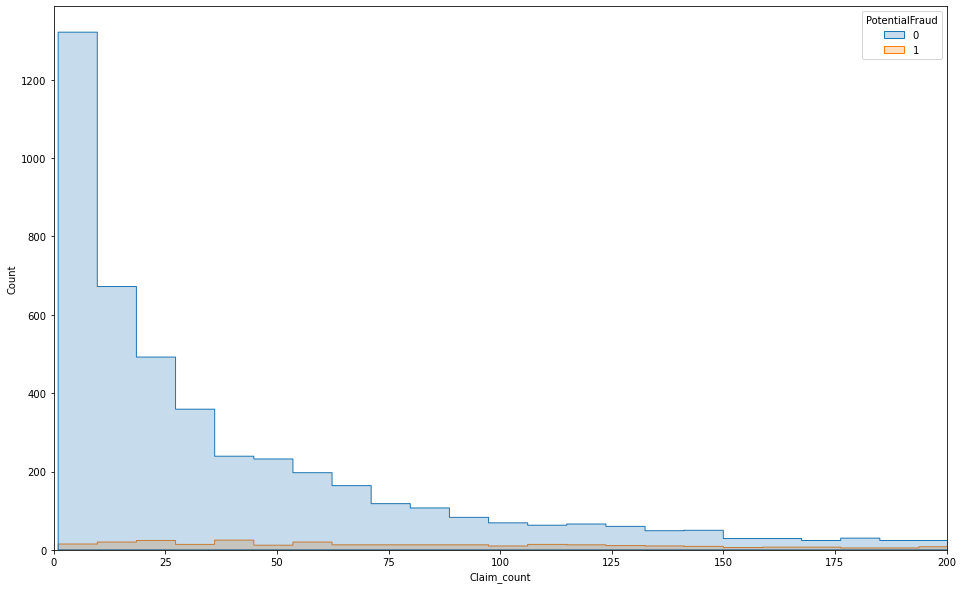

In [23]:
splot = sns.histplot(EDA_1, x="Claim_count", hue="PotentialFraud", element="step", )

splot.autoscale()
splot.set_xlim(0, 200)
fig = plt.gcf()
fig.set_size_inches( 16, 10)

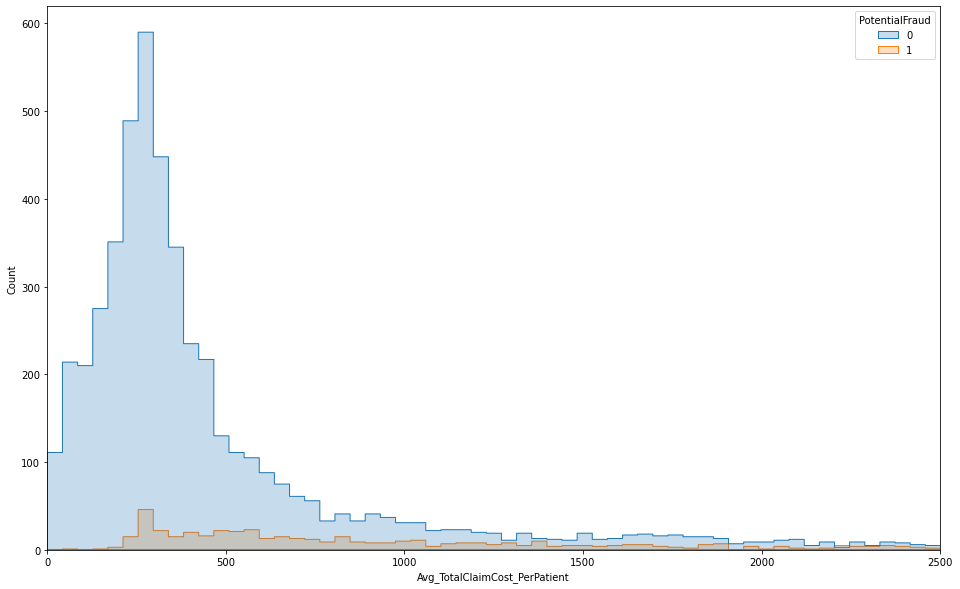

In [9]:
splot = sns.histplot(EDA_1, x="Avg_TotalClaimCost_PerPatient", hue="PotentialFraud", element="step", )

splot.autoscale()
splot.set_xlim(0, 2500)
fig = plt.gcf()
fig.set_size_inches( 16, 10)

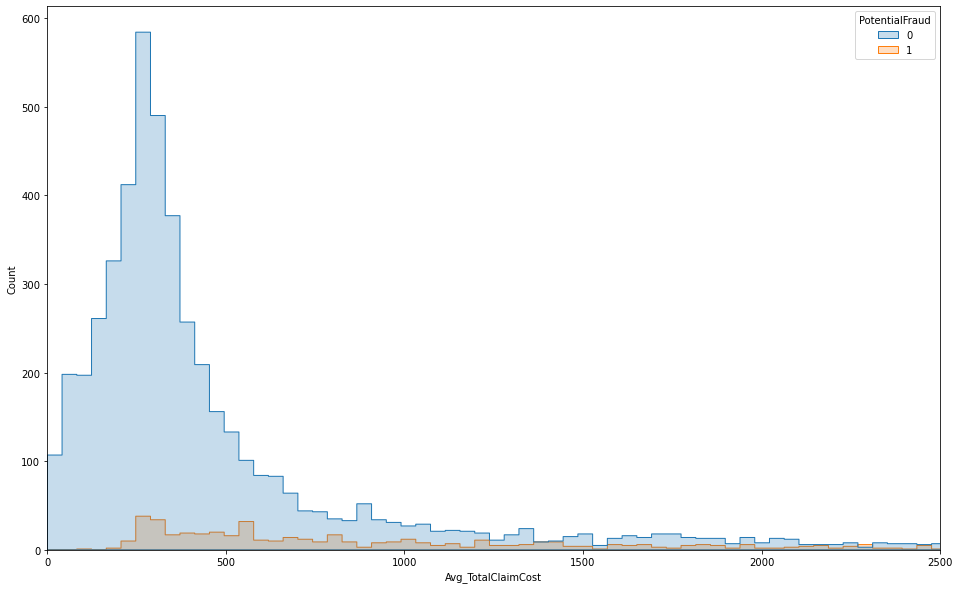

In [11]:
splot = sns.histplot(EDA_1, x="Avg_TotalClaimCost", hue="PotentialFraud", element="step", )

splot.autoscale()
splot.set_xlim(0, 2500)
fig = plt.gcf()
fig.set_size_inches( 16, 10)

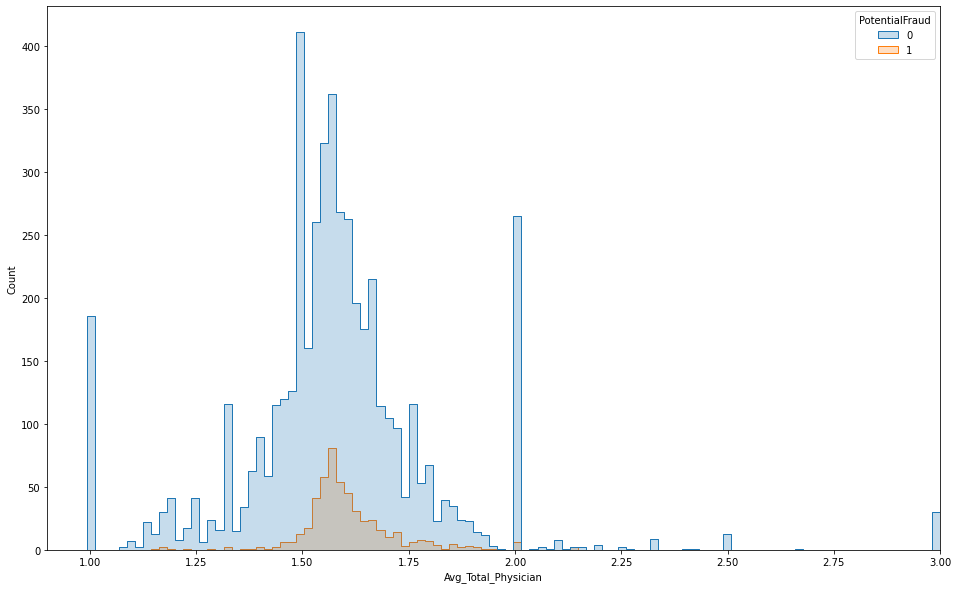

In [12]:
splot = sns.histplot(EDA_1, x="Avg_Total_Physician", hue="PotentialFraud", element="step", )

splot.autoscale()
splot.set_xlim(0.9, 3)
fig = plt.gcf()
fig.set_size_inches( 16, 10)

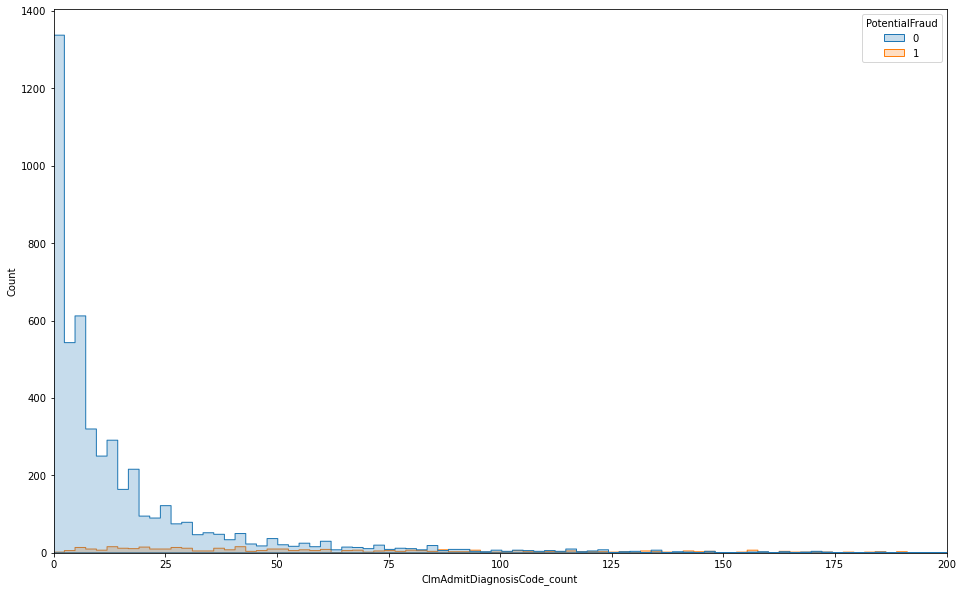

In [13]:
splot = sns.histplot(EDA_1, x="ClmAdmitDiagnosisCode_count", hue="PotentialFraud", element="step", )
splot.autoscale()
splot.set_xlim(0, 200)
fig = plt.gcf()
fig.set_size_inches( 16, 10)

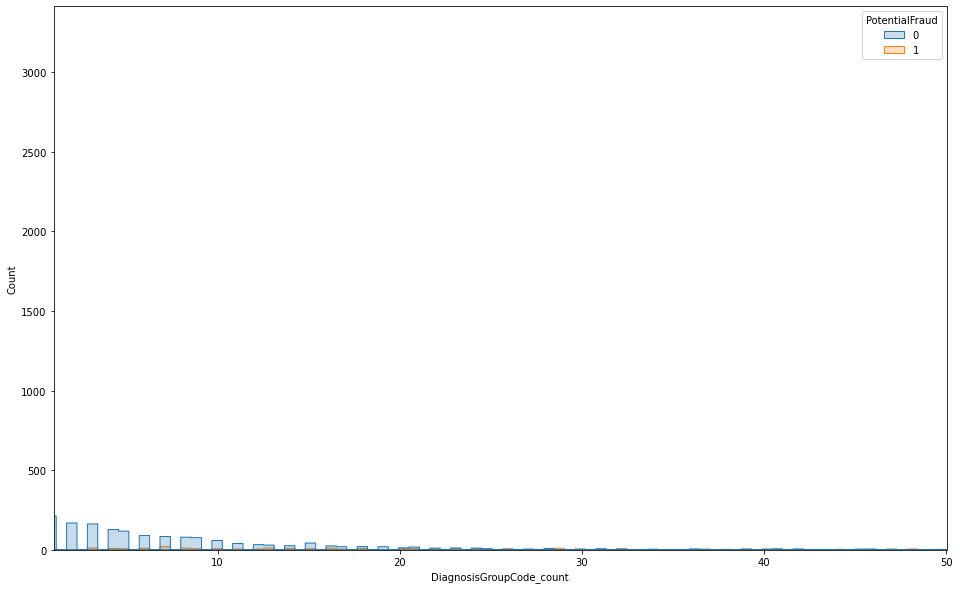

In [14]:
splot = sns.histplot(EDA_1, x="DiagnosisGroupCode_count", hue="PotentialFraud", element="step", )
splot.autoscale()
splot.set_xlim(1, 50)
fig = plt.gcf()
fig.set_size_inches( 16, 10)

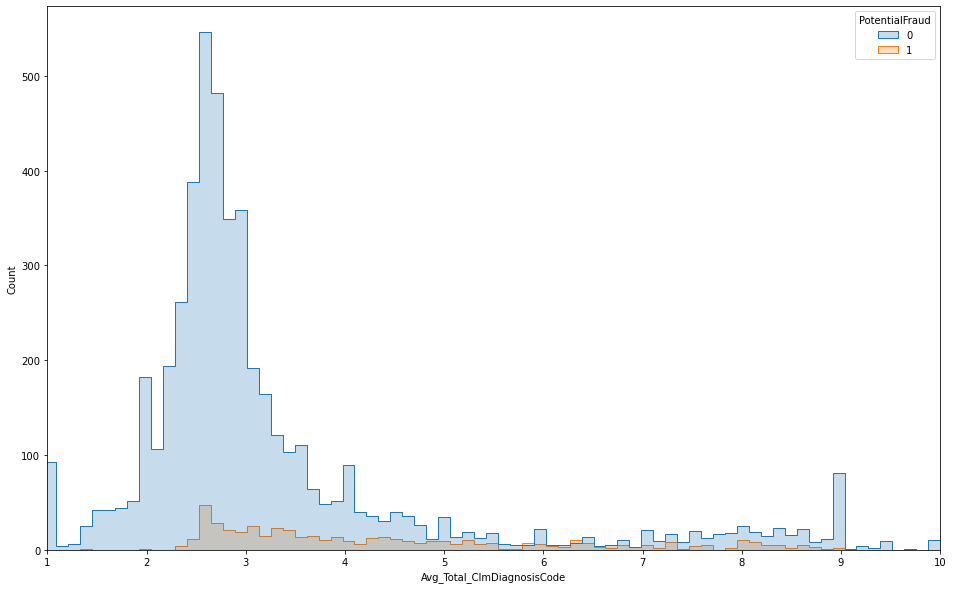

In [17]:
splot = sns.histplot(EDA_1, x="Avg_Total_ClmDiagnosisCode", hue="PotentialFraud", element="step", )
splot.autoscale()
splot.set_xlim(1, 10)
fig = plt.gcf()
fig.set_size_inches( 16, 10)

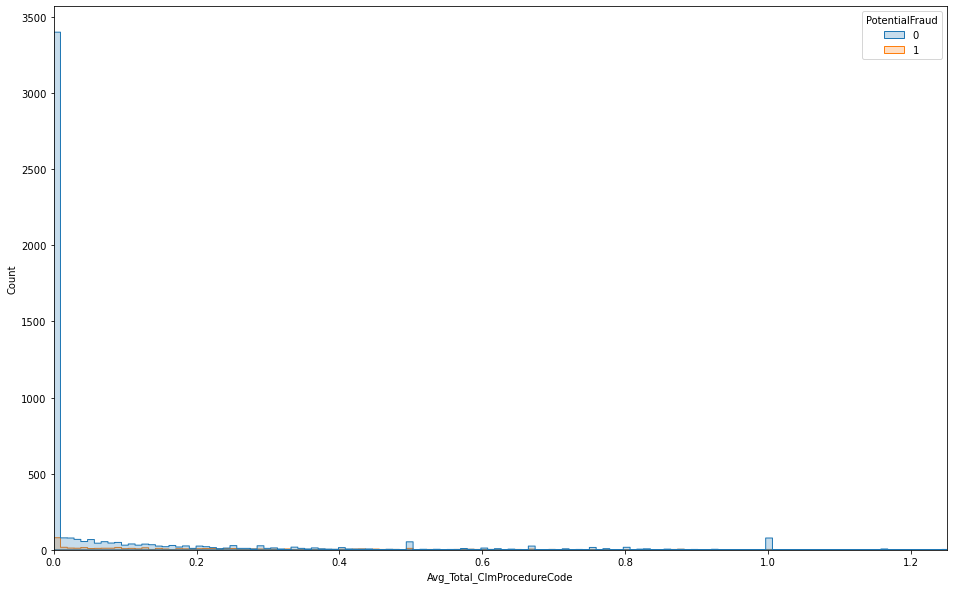

In [21]:
splot = sns.histplot(EDA_1, x="Avg_Total_ClmProcedureCode", hue="PotentialFraud", element="step", )
splot.autoscale()
splot.set_xlim(0, 1.25)
fig = plt.gcf()
fig.set_size_inches( 16, 10)

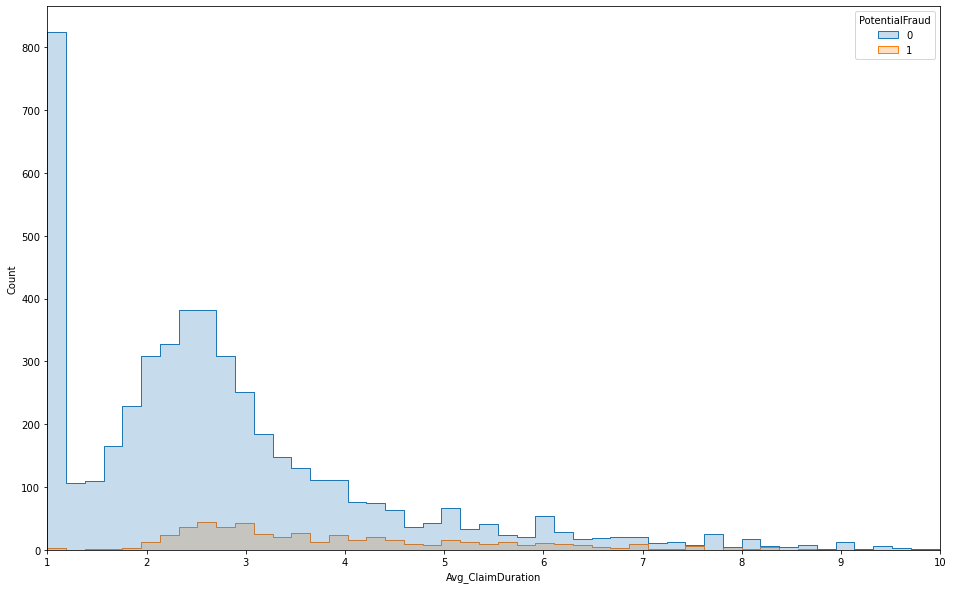

In [17]:
splot = sns.histplot(EDA_1, x="Avg_ClaimDuration", hue="PotentialFraud", element="step", )
splot.autoscale()
splot.set_xlim(1, 10)
fig = plt.gcf()
fig.set_size_inches( 16, 10)

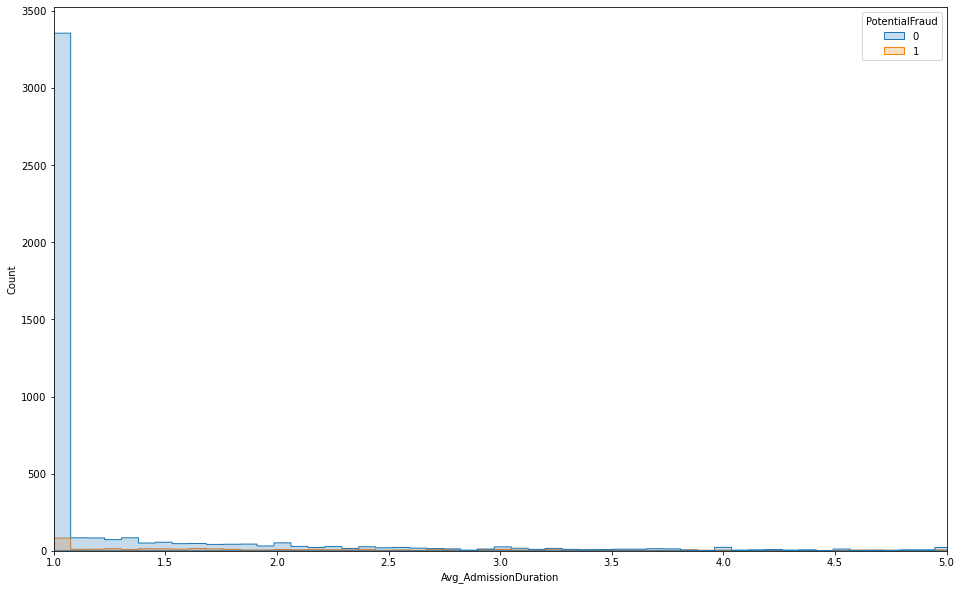

In [19]:
splot = sns.histplot(EDA_1, x="Avg_AdmissionDuration", hue="PotentialFraud", element="step", )
splot.autoscale()
splot.set_xlim(1, 5)
fig = plt.gcf()
fig.set_size_inches( 16, 10)